<h3>Plotting SVC performance</h3>

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Try classifying classes 1 and 2 from the iris dataset with SVMs !!!!Only 2 classes!!!!
X = X[y != 0, :2]
y = y[y != 0]

np.unique(y)

array([1, 2])

In [2]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
# np.random.seed(0)
# indices = np.random.permutation(len(X))
# X_train = X[indices[:-10]]
# y_train = y[indices[:-10]]
# X_test  = X[indices[-10:]]
# y_test  = y[indices[-10:]]

# print('shape of train set %s' % str(X_train.shape))
# print('shape of test set %s' % str(X_test.shape))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train.shape, y_train.shape

((90, 2), (90,))

In [4]:
X_test.shape, y_test.shape

((10, 2), (10,))

In [5]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.7222222222222222

In [6]:
svc.score(X_test, y_test)

0.9

In [7]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

svc_linear = svm.SVC(kernel='linear').fit(X_train, y_train)

svc_poly = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

svc_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)

print("SVC score: %f  " % svc_linear.score(X_test, y_test))
print("SVC score: %f  " % svc_poly.score(X_test, y_test))
print("SVC score: %f  " % svc_rbf.score(X_test, y_test))

SVC score: 0.900000  
SVC score: 0.800000  
SVC score: 0.900000  


SVC linear score: 0.9
SVC poly score: 0.8
SVC rbf score: 0.9


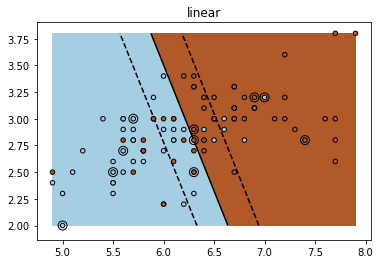

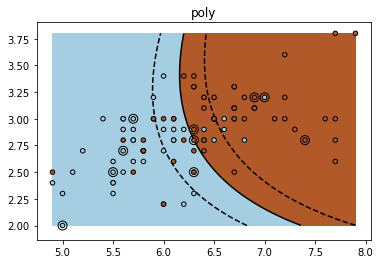

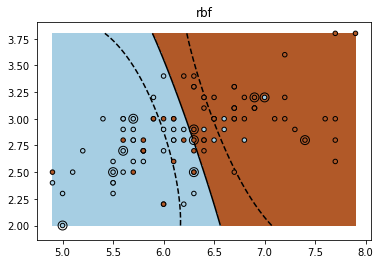

In [26]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

for fig_num, kernel in enumerate(('linear', 'poly', 'rbf')):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('SVC {} score: {}'.format(kernel, score))
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)